In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
im = cv2.imread('C:\\Users\\ADMIN\\Desktop\\Mayuri\\kmeans\\elephant (1).jpg') # read an image in BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_image=im.shape
print(im.shape)

(330, 500, 3)


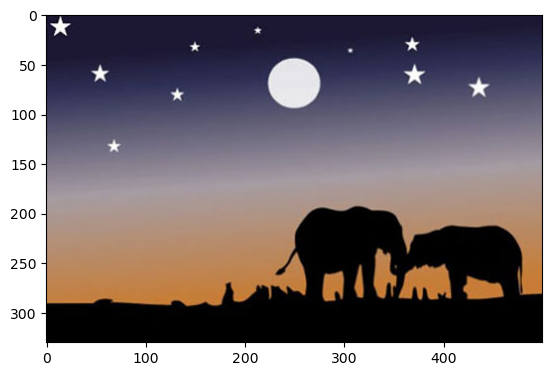

In [10]:
plt.imshow(im)
plt.show()

In [12]:
# flatten each channel of the image in linear array 

all_pixels = im.reshape((330*500, 3))
print(all_pixels.shape)

# one linear array for each color, (red , green , and blue channel)

(165000, 3)


In [14]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(n_clusters=4)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [18]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[  1   1   1]
 [187 133  87]
 [ 49  47  75]
 [151 139 146]]


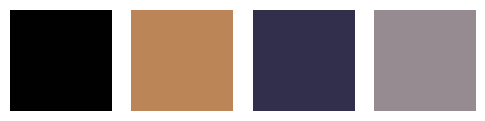

In [20]:
#Plot all colors
plt.figure(0,figsize=(6,2))

i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i+=1
    
    colors.append(each_col)
    
    # Color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

In [22]:
#Segmenting Our Original Image
new_img = np.zeros((330*500, 3), dtype='uint8')

print(new_img.shape)

(165000, 3)


In [24]:
colors

[array([1, 1, 1], dtype=uint8),
 array([187, 133,  87], dtype=uint8),
 array([49, 47, 75], dtype=uint8),
 array([151, 139, 146], dtype=uint8)]

In [26]:
km.labels_

array([2, 2, 2, ..., 0, 0, 0])

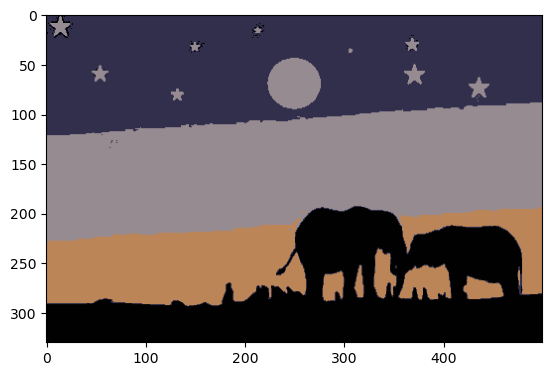

In [28]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
# print(original_image)    
    
new_img = new_img.reshape((original_image))
# print(new_img.shape)
plt.imshow(new_img)
plt.show()